# Dask basics

This notebook aims at explaining how Dask works, using the `delayed` function
examples from the [documentation](https://docs.dask.org/en/latest/delayed.html).

There are many ways to use Dask. The following one is quite low-level but
provides a good intuitation about what is happening in the background when Dask
run some computations.

In [1]:
import dask

## Regular computations

First we define some simple function and use then for a simple computation.

In [2]:
def inc(x):
    return x + 1


def double(x):
    return x * 2


def add(x, y):
    return x + y


x = inc(1)
y = inc(2)
z = add(x, y)
z

5

## Delayed computations

Here we defer the evaluation of the functions. Nothing is computed until we
submit the whole computation graph to Dask.

The `dask.delayed` function wraps each function (`inc` and `add`) and transform
them into *tasks*.

In [3]:
x = dask.delayed(inc)(1)
y = dask.delayed(inc)(2)
z = dask.delayed(add)(x, y)
z

Delayed('add-af933b7d-5818-475b-a923-ed805e7f8547')

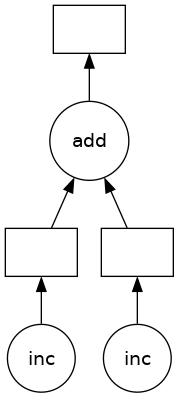

In [4]:
z.visualize()

In [5]:
z.compute()

5

## More complex tasks graph

In this example, we will try a more complex computation, with more dependencies
between each step.

In [6]:
data = [1, 2, 3, 4, 5]

output = []
for x in data:
    a = inc(x)
    b = double(x)
    c = add(a, b)
    output.append(c)

total = sum(output)

And here is the corresponding version, runnable using Dask.

In [7]:
output = []
for x in data:
    a = dask.delayed(inc)(x)
    b = dask.delayed(double)(x)
    c = dask.delayed(add)(a, b)
    output.append(c)

total = dask.delayed(sum)(output)
total

Delayed('sum-a57684db-153c-43eb-b103-83c358374cca')

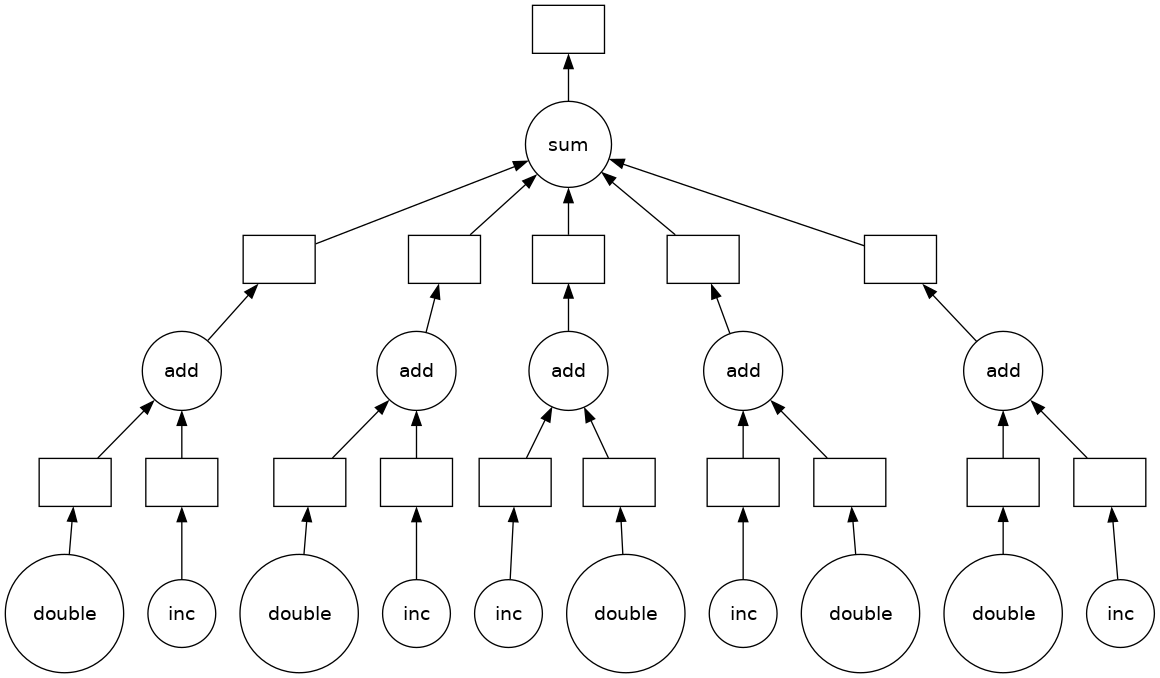

In [8]:
total.visualize()

In [9]:
total.compute()

50